In [140]:
import warnings
warnings.simplefilter('ignore')

In [141]:
# Install/import dependencies
# prophet, pandas

import pandas as pd
from prophet import Prophet


In [142]:
# Read data + process data 
from pandas import read_csv
path = 'data.csv'
df = read_csv(path)
# First few rows
print(df.head())

   Time Date  Total A&E Attendances
0   20100801                1752381
1   20100901                1756268
2   20101001                1801348
3   20101101                1651027
4   20101201                1737741


In [143]:
# ds is date, y is values

df.dtypes

Time Date                int64
Total A&E Attendances    int64
dtype: object

In [144]:
df.head(2)

,Time Date,Total A&E Attendances
0,20100801,1752381
1,20100901,1756268


In [145]:
# Pre-processing

df['Year'] = df['Time Date'].apply(lambda x: str(x)[-8:-4])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-4:-2])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[-2:])
df['ds'] = pd.DatetimeIndex(df['Year'] +'-'+df['Month']+'-'+df['Day'])

In [146]:
df.head(2)

,Time Date,Total A&E Attendances,Year,Month,Day,ds
0,20100801,1752381,2010,08,01,2010-08-01
1,20100901,1756268,2010,09,01,2010-09-01


In [147]:
# Check to see if it is datetime
df.dtypes

Time Date                         int64
Total A&E Attendances             int64
Year                             object
Month                            object
Day                              object
ds                       datetime64[ns]
dtype: object

In [148]:
df.head

<bound method NDFrame.head of      Time Date  Total A&E Attendances  Year Month Day         ds
0     20100801                1752381  2010    08  01 2010-08-01
1     20100901                1756268  2010    09  01 2010-09-01
2     20101001                1801348  2010    10  01 2010-10-01
3     20101101                1651027  2010    11  01 2010-11-01
4     20101201                1737741  2010    12  01 2010-12-01
..         ...                    ...   ...   ...  ..        ...
110   20191001                2170885  2019    10  01 2019-10-01
111   20191101                2143505  2019    11  01 2019-11-01
112   20191201                2180537  2019    12  01 2019-12-01
113   20200101                2114709  2020    01  01 2020-01-01
114   20200201                1969691  2020    02  01 2020-02-01

[115 rows x 6 columns]>

In [149]:
# Drop columns that are not needed inc. unique values, axis=1 is to drop the coloumns 
# inplace=True is for the same dataset (not creating another dataset)
# Can filter by specific type of emergency department by using a slicer (df[df['X']=='specifics'])

df.drop(['Time Date', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = 'y', 'ds'

In [150]:
df.head()

,y,ds
0,1752381,2010-08-01
1,1756268,2010-09-01
2,1801348,2010-10-01
3,1651027,2010-11-01
4,1737741,2010-12-01


In [151]:
# Train Model


m = Prophet(interval_width=0.95)

model = m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [152]:
#Forecast - trends, lower and upper estimates, daily seasonality, yhat is the predicted forecast
#periods you want to forecast for - up to 100. Frequency is by Month
# second line forecasts forward

future = m.make_future_dataframe(periods=40,freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-08-01,1.783781e+06,1.680980e+06,1.810988e+06,1.783781e+06,1.783781e+06,-38873.638113,-38873.638113,-38873.638113,-38873.638113,-38873.638113,-38873.638113,0.0,0.0,0.0,1.744907e+06
1,2010-09-01,1.785634e+06,1.678803e+06,1.804076e+06,1.785634e+06,1.785634e+06,-44248.385054,-44248.385054,-44248.385054,-44248.385054,-44248.385054,-44248.385054,0.0,0.0,0.0,1.741385e+06
2,2010-10-01,1.787427e+06,1.733439e+06,1.858602e+06,1.787427e+06,1.787427e+06,11546.467003,11546.467003,11546.467003,11546.467003,11546.467003,11546.467003,0.0,0.0,0.0,1.798973e+06
3,2010-11-01,1.789280e+06,1.652606e+06,1.784265e+06,1.789280e+06,1.789280e+06,-68588.521408,-68588.521408,-68588.521408,-68588.521408,-68588.521408,-68588.521408,0.0,0.0,0.0,1.720691e+06
4,2010-12-01,1.791073e+06,1.682107e+06,1.818442e+06,1.791073e+06,1.791073e+06,-40547.327181,-40547.327181,-40547.327181,-40547.327181,-40547.327181,-40547.327181,0.0,0.0,0.0,1.750526e+06


In [153]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
150,2023-01-31,2.415653e+06,2.240210e+06,2.384756e+06,2.383128e+06,2.443376e+06,-104157.342010,-104157.342010,-104157.342010,-104157.342010,-104157.342010,-104157.342010,0.0,0.0,0.0,2.311495e+06
151,2023-02-28,2.421463e+06,2.285225e+06,2.436625e+06,2.387905e+06,2.450373e+06,-66227.451945,-66227.451945,-66227.451945,-66227.451945,-66227.451945,-66227.451945,0.0,0.0,0.0,2.355236e+06
152,2023-03-31,2.427896e+06,2.442644e+06,2.587550e+06,2.392901e+06,2.457921e+06,86590.263520,86590.263520,86590.263520,86590.263520,86590.263520,86590.263520,0.0,0.0,0.0,2.514486e+06
153,2023-04-30,2.434121e+06,2.381526e+06,2.527160e+06,2.397786e+06,2.465036e+06,22878.962246,22878.962246,22878.962246,22878.962246,22878.962246,22878.962246,0.0,0.0,0.0,2.457000e+06
154,2023-05-31,2.440554e+06,2.375500e+06,2.520550e+06,2.402466e+06,2.472646e+06,10201.094180,10201.094180,10201.094180,10201.094180,10201.094180,10201.094180,0.0,0.0,0.0,2.450755e+06


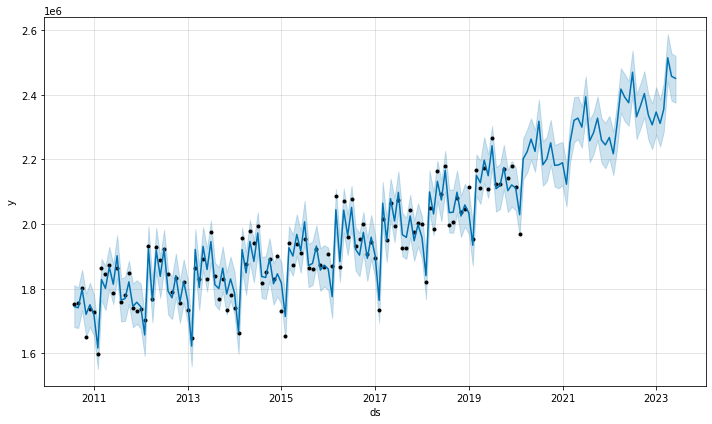

In [154]:
#Plot data, prophet model is stored in variable m


plot1 = m.plot(forecast)

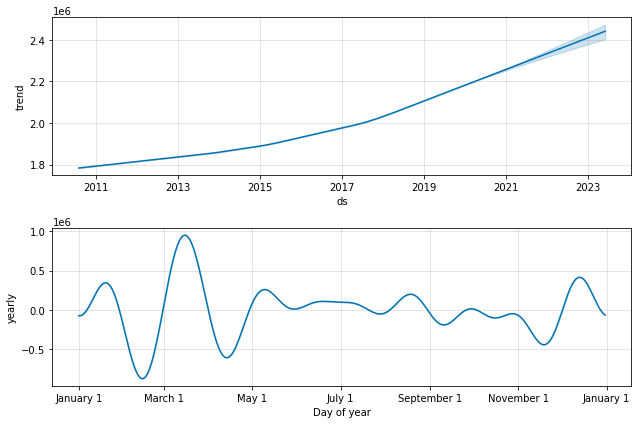

In [155]:
#Decompose

plot2 = m.plot_components(forecast)